# Zenodo DOI

10.5281/zenodo.17957909

In [7]:
%%capture
%pip install -q --upgrade pip setuptools wheel
%pip install -q "numpy<2"
%pip install -q tellurium
!pip install diagrams
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [1]:
!pip install ipywidgets
!pip install matplotlib
!pip install numpy
!pip install scipy

In [9]:
from IPython.display import display
import ipywidgets as widgets

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tellurium as te
from scipy import optimize

## Glucose, Lactate and Oxygen Metabolism in cancer cell

# Abstract


This study investigates cancer cell metabolism by modeling the dynamics of cell proliferation through glycolytic and oxidative pathways, while explicitly tracking nutrient consumption in the form of glucose and lactate. The model further incorporates dynamic oxygen availability to capture its regulatory role in cellular metabolism.

A central question addressed is how the uptake dynamics of glucose and lactate, together with substrate availability, govern the metabolic balance between glycolysis and oxidative phosphorylation and thereby influence the growth of an in vitro tumor cell population. In addition, oxygen dynamics are introduced to examine whether the system responds in a biologically consistent manner under varying oxygen conditions.


# Why do we perform this study?

1. Modeling tumor growth provides enhanced predictive capability and enables in silico exploration of tumor behavior under varying metabolic and environmental conditions.

2. By capturing metabolic heterogeneity, nutrient-driven phenotypic switching, and oxygen-dependent regulation, these models support the rational design of conceptually novel combination therapies.

3. Moreover, they complement standard clinical trials by reducing experimental burden, providing mechanistic insight into therapy-induced metabolic adaptation, and facilitating the integration of multi-scale biological data.

# Introduction:

A mathematical model of tumor cell nutrient uptake governed
by the presence of two key biomolecular fuels: glucose and lactate.  The model allows
us to describe, in a remarkably simple way, different in vitro scenarios previously
reported in experiments of tumor cell metabolism using distinct energy sources.

# Major metabolic pathway for ATP production by cells



1. Oxidative (Aerobic):

Under oxidation phosporylation cell can either consume glucose and oxygen or lactate and oxygen based on the MCTs Monocarboxylate transporters.

$\begin{aligned}Glucose + 6 O2   → 6 CO2 + 6 H2O + (30-32) ATP   (alpha G (Passive transporters in high)) \end{aligned}$

$\begin{aligned}2 Lactate + 6 O2 → 6 CO2 + 6 H2O + (30 – 32) ATP   (alpha L (Passive transporters in high)) \end{aligned}$


2. Glycolysis (Anaerobic):

$\begin{aligned}Glucose → 2 Lactate + 2 ATP \end{aligned}$


# Warburg effect:

1. This is phenomenon of Cancer cell  which undergo Glycolysis more than oxidative phosphorylation even in the presence of O2. This also known as aerobic glycolysis

2. First described by Otto Warburg (1920s)


# Glycolytic Phenotype:

1. A metabolic configuration in which a cell relies predominantly on glycolysis for ATP and biomass production, often with lactate secretion.

2. This can occur with or without oxygen


# Now characteristics of Tumor cells

1. Tumor vasculature is highly irregular and functionally compromised, leading to pronounced spatial and temporal heterogeneity in oxygen availability, pH, and the concentrations of key metabolites such as glucose and lactate.

2. Under these fluctuating and often extreme microenvironmental conditions, cancer cells undergo adaptive metabolic responses that enable survival and continued proliferation.

3. Limited oxygen availability favors anaerobic glycolysis, whereas oxygenated regions support oxidative phosphorylation.

4. Notably, many malignant cells exhibit aerobic glycolysis, known as the Warburg effect, resulting in a glycolytic phenotype even in the presence of oxygen.

5. These environmental pressures and metabolic adaptations collectively drive dynamic switching between glycolytic and oxidative metabolic states, substantially influencing tumor growth and progression.





Tumor cell metabolism System:


In [ ]:
# @title
from graphviz import Digraph

dot = Digraph("CausalDiagram", format="png")
dot.attr(rankdir='LR', fontsize='14')
dot.attr('node', shape='circle', fontname='Helvetica', fontsize='14')


dot.edge("po", "pg", label = 'switchs to',  arrowhead = "vee")
dot.edge("pg", "po",  label = 'switchs to', arrowhead="vee")



dot.edge("L", "po", label = 'consumed', color="green", arrowhead = "vee")
dot.edge("G", "pg", label = 'consumed',color="green")
dot.edge("L", "pg", color="red", arrowhead = "tee")
dot.edge('pg','L', label = 'produced',color = "black", arrowhead ='vee')


dot

#  The Proliferation of oxidative cells


1. At a given time t a fraction of the total population Po undergoes aerobic oxidation of glucose.



$\begin{aligned} \frac{d p_o}{d t} & =\frac{1}{\tau_o}\left(1-p_o-p_g\right) p_o+\frac{1}{\tau_{g o}} \chi_L(L) p_g-\frac{1}{\tau_{o g}} \chi_L^*(L) \chi_G(G) p_o\end{aligned}$



$\tau o$ -  Oxidative cells proliferation(days)


$\tau og$ -  Switch time from oxidative to glycolytic phenotype(days)


1. The first term in above equation is a standard logistic cell proliferation of po. the total maximum population of cell that can fit on the petri dish is scaled to 1. (P* is the total cell that can grow in the petri dish) (po + pg <<P*)

2. Initally the culture starts with warburg phenotype, replicating the tumor characteristic. As glycolysis results in more lactate which makes the medium more acidic and pushes the cells to switch to oxidative metabolism bringing PH regulation.

  
    Now second term in above equation is incorporated to reflect this switch. we will discuss about this switch in detail below


3. The third term describes the inverse process by which cells switch back to the warburg phenotype upon low lactate levels







# Proliferation of Glycolytic Cell

At a given time t a fraction of the to
tal population Pg undergoes anerobic respiration.

$\begin{aligned}\\ \frac{d p_g}{d t} & =\frac{1}{\tau_g}\left(1-p_o-p_g\right) p_g-\frac{1}{\tau_{g o}} \chi_L(L) p_g+\frac{1}{\tau_{o g}} \chi_L^*(L) \chi_G(G) p_o \end{aligned}$

Where,

$\tau g$ - Glycolytic cells proliferation(days)

$\tau go$ -   Switch time from glycolytic to oxidative phenotype(days)


1. The first term in above equation is a standard logistic cell proliferation of pg. the total maximum population of cell that can fit on the petri dish is scaled to 1. (P* is the total cell that can grow in the petri dish) (po + pg <<P*)

2. Initally the culture starts with warburg phenotype, replicating the tumor characteristic. As glycolysis results in more lactate which makes the medium more acidic and pushes the cells to switch to oxidative metabolism bringing PH regulation.

  
    Now second term in above equation is incorporated to reflect this switch. we will discuss about this switch in detail below


3. The third term describes the inverse process by which cells switch back to the warburg phenotype upon low lactate levels





# Michaelis Menten constant

1. The Michaelis Menten constants define the sensitivity of glucose and lactate uptake rates to substrate availability.

2. Lower values correspond to higher affinity uptake, allowing cells to sustain metabolism under nutrient-limited conditions.

3. These parameters are essential for capturing transporter saturation and substrate-dependent metabolic switching.

# Glucose Consumption


$\begin{aligned} \\ \frac{d G}{d t} & =-\kappa_o \frac{G}{G+\lambda L+n_*} p_o-\kappa_G \frac{G}{G+G_*} p_g \end{aligned}$


where,

$\lambda$ = $\alpha L$ \ $\alpha G$

1. When the expression of MCT1 is high (αL αG), lactate can easily enter the
cell and is oxidized instead of glucose. In the model, high values of lactate inhibit
the glucose consumption , thus slowing down the consumption of glucose
through oxidation.


2. When oxidative cells have a very low expression of MCT1 in the membrane
(αL
αG), and assuming that no other lactate importers are expressed in the plasma
membrane, they cannot use the extracellular lactate to oxidize it and thus they mainly
undergo glucose respiration. In that case, the fraction αLL/(αGG + αLL + M∗) is
very small.


kG -  Glucose consumption by glycolytic cells (mM/day)

KO - Glucose consumotion by oxidative cells (mM/day)


# Lactate Consumption


$\begin{aligned} \frac{d L}{d t} & =-\kappa_L \frac{L}{G / \lambda+L+m_*} p_o+2 \kappa_G \frac{G}{G+G_*} p_g .\end{aligned}$

where,

kL - Lactate consumption by oxidative cell

1. The first term in previous equation and this is  almost analogous to the Michaelis–Menten term
explained above where N∗ and M∗ play a similar role than G∗.

2. The Second term, in the glycolytic pathway, two lactate molecules are produced per glucose consumed.



# All the above ODE together

$\begin{aligned} \frac{d p_o}{d t} & =\frac{1}{\tau_o}\left(1-p_o-p_g\right) p_o+\frac{1}{\tau_{g o}} \chi_L(L) p_g-\frac{1}{\tau_{o g}} \chi_L^*(L) \chi_G(G) p_o, \\ \frac{d p_g}{d t} & =\frac{1}{\tau_g}\left(1-p_o-p_g\right) p_g-\frac{1}{\tau_{g o}} \chi_L(L) p_g+\frac{1}{\tau_{o g}} \chi_L^*(L) \chi_G(G) p_o, \\ \frac{d G}{d t} & =-\kappa_o \frac{G}{G+\lambda L+n_*} p_o-\kappa_G \frac{G}{G+G_*} p_g, \\ \frac{d L}{d t} & =-\kappa_L \frac{L}{G / \lambda+L+m_*} p_o+2 \kappa_G \frac{G}{G+G_*} p_g .\end{aligned}$

$\chi_L(L)=\frac{1}{2}\left[1+\tanh \left(\gamma\left(L-L_*\right)\right)\right]$

$\chi_L^*(L)= 1 - \chi_L(L)$

$\chi_G(G)= \begin{cases}0, & \text { if } G \leq G_{\mathrm{min}}, \\ 1, & \text { if } G>G_{\mathrm{min}},\end{cases}$




# How medium's cell Proliferation will look, if we have only glycolysis metabolism (which means cells in the medium will go through anerobic respiration) ?

In [14]:
# @title

antimony_gly = r'''

model glc_lac_simple()

  // G'  = -(ko * (G * po)/(G + (lam * L) + n)) - (kG * (G *pg)/(G + G_star));

  R_2: G -> ; kG * (G/(G + G_star))  * pg ;

  // L'  = -(kL * (L * po)/((G/lam) + L + m)) + (2*kG * (G *pg)/(G + G_star));

  R_4: -> L ; 2 * kG * (G /(G + G_star)) * pg;


  // pg' = ( (1/tg) * (1 - po - pg) * pg ) - ( (1/tgo) * XL * pg ) + ( (1/tog) * XL_star * XG * po );

  R_8: -> pg ; (1/tg)* (1 - pg)  * pg ;
  #R_9: pg -> ; (1/tgo) * XL * pg;
  #R_10: -> pg ; (1/tog) * XL_star * XG * po;

  //switches
  XL := (1/2) * (1 + tanh( a * ( L - L_star)))
  XL_star := 1 - XL
  XG := piecewise(0, G <= G_star, 1)


  // Species (initial values)
  G  = 0.0;        // extracellular glucose (mM)
  L  = 0.0;        // extracellular lactate (mM)
  pg = 0.81;        // glycolytic cells (cells) in percentage to total p*
  po = 0.0;        // oxidative cells (cells) in percentage to total P*

  // Parameters
  P_star = 1.0;       // cells in percentage to total 1
  L_star = 10         // Lactate threshold (mM)
  G_star = 0.5        // Glucose threshold (mM)
  ko = 1.5            // Glucose consumption by oxidative cells (mM/day)
  kG = 10             // Glucose consumption by glycolytic cells (mM/day)
  kL = 5              // Lactate consumption by oxidative cells (mM/day)
  n = 1               // parameter for glucose oxidation (mM)
  m = 1               // parameter for lactate oxidation (mM)
  lam = 1             // Preference for lactate
  to = 3.321          // oxidative cell proliferation(days)
  tg = 3.321          // glycolytic cell proliferation(days)
  tgo = 1             // switch time from glycolytic to oxidative phenotype(days)
  tog = 1/24          // swtich time from oxidative to glycolytic phenotype(days)
  a = 100             // sensibility switch parameter (1/mM)

  // Flux definitions
  # XL = (1/2) * (1 + tanh( a * ( L - L_star)))
  # XL_star = 1 - XL
  # XG = piecewise(0, G <= G_star, 1)

end
'''

r_gly = te.loadAntimonyModel(antimony_gly)

#result_gly = r_gly.simulate(0, 10, 50, ['time','G','pg'])


def simulate_antimony(G=0.0, L=0, time_end=10):
    model = r_gly

    model.reset()
    model.G = G
    model.L = L


    model.integrator.relative_tolerance = 1e-6
    model.integrator.absolute_tolerance = 1e-12
    model.integrator.stiff = True


    result = model.simulate(0, time_end, 1000, ['time','G','L','pg'])
    #print(result['XL'])

    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.plot(result['time'], result['G'], label='G')
    plt.plot(result['time'], result['L'], label='L')
    plt.xlabel('Time (days)')
    plt.ylabel('Concentration (mM)')
    plt.title(f'Simulation: G={G:.2f}, L={L:.2f}')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(result['time'], result['pg'], label='pg')
    plt.xlabel('Time (days)')
    plt.ylabel('Cell metabolism in medium (in percentage)')
    plt.title(f'Simulation: G={G:.2f}, L={L:.2f}')
    plt.legend()


    plt.tight_layout()
    plt.show()

widgets.interact(
    simulate_antimony,
    G=widgets.FloatSlider(min=0.0, max=30.0, step=0.01, value=10.0),
    L=widgets.FloatSlider(min=0.0, max=30.0, step=0.01, value=0.0),
    time_end=widgets.FloatSlider(min=1, max=30, step=1, value=4)
)




interactive(children=(FloatSlider(value=10.0, description='G', max=30.0, step=0.01), FloatSlider(value=0.0, de…

<function __main__.simulate_antimony(G=0.0, L=0, time_end=10)>

# Inference:

1. Cell proliferation is directly limited by glucose availability and lactate accumulation.

2. G_star, which is Michaelis-Menten constant for Glycolytic cells(mM) is kept at 4 mM. This is defined as the glucose concentration at which the uptake rate is 50% of its maximum value.

3. With Low G_star -  cells can uptake glucose efficiently even when glucose is scarce and High G_star - cells need high glucose to maintain uptake.

4. Here, P* = Pg, total population will be equal to population undergoes glycolysis.

# How the system looks when only aerobic respiration is happening ?

In [15]:
# @title

antimony_oxi = r'''

model glc_lac_simple()

  // G'  = -(ko * (G * po)/(G + (lam * L) + n)) - (kG * (G *pg)/(G + G_star));

  R_1: G -> ; ko * (G/(G + (lam * L) + n)) * po;
  #R_2: G -> ; kG * (G/(G + G_star))  * pg ;

  // L'  = -(kL * (L * po)/((G/lam) + L + m)) + (2*kG * (G *pg)/(G + G_star));

  R_3: L -> ; kL * (L /((G/lam) + L + m)) * po;
  #R_4: -> L ; 2 * kG * (G /(G + G_star)) * pg;

  // po' = ( (1/to) * (1 - po - pg) * po ) + ( (1/tgo) * XL * pg ) - ( (1/tog) * XL_star * XG * po );

  R_5: -> po ; (1/to) * (1 - po - pg) * po;
  #R_6: pg -> po ; (1/tgo) * XL * pg;
  #R_7: po -> ; (1/tog) * XL_star * XG * po;

  // pg' = ( (1/tg) * (1 - po - pg) * pg ) - ( (1/tgo) * XL * pg ) + ( (1/tog) * XL_star * XG * po );

  # R_8: -> pg ; (1/tg) * (1 - po - pg) * pg;
  # R_9: pg -> ; (1/tgo) * XL * pg;
  # R_10: po -> pg ; (1/tog) * XL_star * XG * po;

  // switches
  XL = (1/2) * (1 + tanh( a * ( L - L_star)))
  XL_star = 1 - XL
  XG = piecewise(0, G <= G_star, 1)


  // Species (initial values)
  G  = 5.4;        // extracellular glucose (mM)
  L  = 30.0;        // extracellular lactate (mM)
  pg = 0.11;        // glycolytic cells (cells) in percentage to total p*
  po = 0.11;        // oxidative cells (cells) in percentage to total P*

  // Parameters (replace with paper values)
  L_star = 10
  G_star = 0.5
  ko = 1.5
  kG = 10
  kL = 5
  n = 1
  m = 1
  lam = 100
  to = 3.321
  tg = 3.321
  tgo = 1
  tog = 1/24
  a = 100

  // Flux definitions
  # XL = (1/2) * (1 + tanh( a * ( L - L_star)))
  # XL_star = 1 - XL
  # XG = piecewise(0, G <= G_star, 1)

end
'''

r_oxi = te.loadAntimonyModel(antimony_oxi)

result_oxi = r_oxi.simulate(0, 30, 50, ['time','G','L','po'])


def simulate_antimony(G=0, L=0, time_end=10):
    model = r_oxi

    model.reset()
    model.G = max(G, 1e-6)
    model.L = max(L, 1e-6)


    model.integrator.relative_tolerance = 1e-6
    model.integrator.absolute_tolerance = 1e-12
    model.integrator.stiff = True


    result = model.simulate(0, time_end, 1000, ['time','G','L','po'])

    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.plot(result['time'], result['G'], label='G')
    plt.plot(result['time'], result['L'], label='L')
    plt.xlabel('Time (days)')
    plt.ylabel('Concentration (mM)')
    plt.title(f'Simulation: G={G:.2f}, L={L:.2f}')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(result['time'], result['po'], label='po')
    #plt.plot(result['time'], result['pg'], label='pg')
    plt.xlabel('Time (days)')
    plt.ylabel('Cell concentration in medium (in %)')
    plt.title(f'Simulation: G={G:.2f}, L={L:.2f}')
    plt.legend()


    plt.tight_layout()
    plt.show()

widgets.interact(
    simulate_antimony,
    G=widgets.FloatSlider(min=0.0, max=30.0, step=0.01, value=8.0),
    L=widgets.FloatSlider(min=0.0, max=30.0, step=0.01, value=10.0),
    time_end=widgets.FloatSlider(min=1, max=100, step=1, value=20)
)


interactive(children=(FloatSlider(value=8.0, description='G', max=30.0, step=0.01), FloatSlider(value=10.0, de…

<function __main__.simulate_antimony(G=0, L=0, time_end=10)>

# Inference:

1. In this above model, we have set the (MCT1) $\alpha L$ >> $\alpha G$ = ($\lambda$ = $\alpha L$ / $\alpha G$) which will enable the oxidative cells to undergo matabolism consuming Lactate.

2. In the above plot, you can see the cells consumes lactate first and then starts to consume glucose upon unavailability.

# Switch that is responsible for Pg to Po


# Lactate Switchs

1. This switch depends on the levels of lactate(L) and the Lactate threshold(L*) that cells are able to support and on the medium's acidity ($\gamma$).

2. Switch XL is a increasing function, close to zero for low Lactate, and XL_star is decreasing function, close to one for High lactate.

3. The glycolysis is  PH dependent which mean parameter ($\gamma$) is a measure of cell sensitivity to change in lactate.



$\chi_L(L)=\frac{1}{2}\left[1+\tanh \left(\gamma\left(L-L_*\right)\right)\right]$  



$\chi_L^*(L)= 1 - \chi_L(L)$



# Glucose Switch Function

1. In the absence
of glucose, cells do not switch to a glycolytic metabolism.
2. Without this function, in
absence of glucose, and with lactate concentration lower than the acidosis threshold
but sufficient to survive, cells would become glycolytic but could not consume any
nutrients.


$\chi_G(G)= \begin{cases}0, & \text { if } G \leq G_{\mathrm{min}}, \\ 1, & \text { if } G>G_{\mathrm{min}},\end{cases}$


where, Gmin represents the minimum level of glucose that cells are able to uptake

In [16]:
# @title
antimony_LN18 = r'''

model glc_lac_simple()

  // G'  = -(ko * (G * po)/(G + (lam * L) + n)) - (kG * (G *pg)/(G + G_star));

  R_1: G -> ; ko * (G/(G + (lam * L) + n)) * po;
  R_2: G -> ; kG * (G/(G + G_star))  * pg ;

  // L'  = -(kL * (L * po)/((G/lam) + L + m)) + (2*kG * (G *pg)/(G + G_star));

  R_3: L -> ; kL * (L /((G/lam) + L + m)) * po;
  R_4: -> L ; 2 * kG * (G /(G + G_star)) * pg;

  // po' = ( (1/to) * (1 - po - pg) * po ) + ( (1/tgo) * XL * pg ) - ( (1/tog) * XL_star * XG * po );

  R_5: -> po ; (1/to) * (1 - po - pg) * po;
  R_6: pg -> po ; (1/tgo) * XL * pg;
  //R_7: po -> pg ; (1/tog) * XL_star * XG * po;

  // pg' = ( (1/tg) * (1 - po - pg) * pg ) - ( (1/tgo) * XL * pg ) + ( (1/tog) * XL_star * XG * po );

  R_8: -> pg ; (1/tg) * (1 - po - pg) * pg;
  //R_9: pg -> po ; (1/tgo) * XL * pg;
  R_10: po -> pg ; (1/tog) * XL_star * XG * po;

  //switches
  XL := (1/2) * (1 + tanh( a * ( L - L_star)))
  XL_star := 1 - XL
  XG := piecewise(0, G <= G_star, 1)


  // Species (initial values)
  G  = 2.0;        // extracellular glucose (mM)
  L  = 0.1;        // extracellular lactate (mM)
  pg = 0.11;        // glycolytic cells (cells) in percentage to total p*
  po = 0.11;        // oxidative cells (cells) in percentage to total P*

  // Parameters
  L_star = 10
  G_star = 0.5
  ko = 1.5
  kG = 10
  kL = 5
  n = 1
  m = 1
  lam = 1
  to = 3.321
  tg = 3.321
  tgo = 1
  tog = 1/24
  a = 100

  // Flux definitions
  # XL = (1/2) * (1 + tanh( a * ( L - L_star)))
  # XL_star = 1 - XL
  # XG = piecewise(0, G <= G_star, 1)

end
'''

r_LN18 = te.loadAntimonyModel(antimony_LN18)

# result_LN18 = r_LN18.simulate(0, 10, 50, ['time','G','L','po','pg'])
# print(r_LN18.XL_star)
# print(r_LN18.L)
# print(r_LN18.L_star)

# plt.figure(figsize=(8,7))
# plt.subplot(2,1,1)
# plt.plot(result_LN18['time'], result_LN18['G'], label='Glucose (mM)')
# plt.plot(result_LN18['time'], result_LN18['L'], label='Lactate (mM)')
# plt.ylabel('mM')
# plt.legend()
# plt.grid(True)

# plt.subplot(2,1,2)
# plt.plot(result_LN18['time'], result_LN18['pg'], label='Glycolytic (pg)')
# plt.plot(result_LN18['time'], result_LN18['po'], label='Oxidative (po)')
# plt.ylabel('Cells')
# plt.xlabel('Time (days)')
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()


#result_LN18 = r_LN18.simulate(0, 4, 50, ['time','G','L','po','pg'])

def simulate_antimony(G=2.0, L=0.1, time_end=10):
    model = r_LN18

    model.reset()

    model.G = G
    model.L = L


    # model.integrator.relative_tolerance = 1e-6
    # model.integrator.absolute_tolerance = 1e-12
    # model.integrator.stiff = True


    result = model.simulate(0, time_end, 500, ['time','G','L','XL','XL_star','XG'])

    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.plot(result['time'], result['XL'], label='XL')
    plt.plot(result['time'], result['L'], label='L')
    plt.xlabel('Time (days)')
    plt.ylabel('Concentration (mM)')
    plt.title(f'Simulation of switch XL and lactate with lactate threshold of L_star = 10:L={L:.2f}')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(result['time'], result['G'], label='G')
    plt.plot(result['time'], result['XG'], label='XG')
    plt.xlabel('Time (days)')
    plt.ylabel('Concentration (mM)')
    plt.title(f'Simulation of switch XG and Glucose with Glucose threshold of G_star = 0.5: G={G:.2f}')
    plt.legend()


    plt.tight_layout()
    plt.show()

widgets.interact(
    simulate_antimony,
    G=widgets.FloatSlider(min=0.0, max=30.0, step=0.01, value=7.0),
    L=widgets.FloatSlider(min=0.0, max=30.0, step=0.01, value=0.1),
    time_end=widgets.FloatSlider(min=1, max=10, step=1, value=10)
)


interactive(children=(FloatSlider(value=7.0, description='G', max=30.0, step=0.01), FloatSlider(value=0.1, des…

<function __main__.simulate_antimony(G=2.0, L=0.1, time_end=10)>

# Glycolysis and Oxidative together

## LN18 cell line consume glucose


In [17]:
# @title
antimony_LN18 = r'''

model glc_lac_simple()

  // G'  = -(ko * (G * po)/(G + (lam * L) + n)) - (kG * (G *pg)/(G + G_star));

  R_1: G -> ; ko * (G/(G + (lam * L) + n)) * po;
  R_2: G -> ; kG * (G/(G + G_star))  * pg ;

  // L'  = -(kL * (L * po)/((G/lam) + L + m)) + (2*kG * (G *pg)/(G + G_star));

  R_3: L -> ; kL * (L /((G/lam) + L + m)) * po;
  R_4: -> L ; 2 * kG * (G /(G + G_star)) * pg;

  // po' = ( (1/to) * (1 - po - pg) * po ) + ( (1/tgo) * XL * pg ) - ( (1/tog) * XL_star * XG * po );

  R_5: -> po ; (1/to) * (1 - po - pg) * po;
  R_6: pg -> po ; (1/tgo) * XL * pg;
  //R_7: po -> pg ; (1/tog) * XL_star * XG * po;

  // pg' = ( (1/tg) * (1 - po - pg) * pg ) - ( (1/tgo) * XL * pg ) + ( (1/tog) * XL_star * XG * po );

  R_8: -> pg ; (1/tg) * (1 - po - pg) * pg;
  //R_9: pg -> po ; (1/tgo) * XL * pg;
  R_10: po -> pg ; (1/tog) * XL_star * XG * po;

  //switches
  XL := (1/2) * (1 + tanh( a * ( L - L_star)))
  XL_star := 1 - XL
  XG := piecewise(0, G <= G_star, 1)


  // Species (initial values)
  G  = 2.0;        // extracellular glucose (mM)
  L  = 0.1;        // extracellular lactate (mM)
  pg = 0.11;        // glycolytic cells (cells) in percentage to total p*
  po = 0.11;        // oxidative cells (cells) in percentage to total P*

  // Parameters
  L_star = 10
  G_star = 0.5
  ko = 1.5
  kG = 10
  kL = 5
  n = 1
  m = 1
  lam = 1
  to = 3.321
  tg = 3.321
  tgo = 1
  tog = 1/24
  a = 100

  // Flux definitions
  # XL = (1/2) * (1 + tanh( a * ( L - L_star)))
  # XL_star = 1 - XL
  # XG = piecewise(0, G <= G_star, 1)

end
'''

r_LN18 = te.loadAntimonyModel(antimony_LN18)



def simulate_antimony(G=2.0, L=0.1, time_end=10):
    model = r_LN18

    model.reset()

    model.G = G
    model.L = L


    result = model.simulate(0, time_end, 500, ['time','G','L','po', 'pg'])

    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.plot(result['time'], result['G'], label='G')
    plt.plot(result['time'], result['L'], label='L')
    plt.xlabel('Time (days)')
    plt.ylabel('Concentration (mM)')
    plt.title(f'Simulation: initial G={G:.2f}, L={L:.2f}')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(result['time'], result['po'], label='po')
    plt.plot(result['time'], result['pg'], label='pg')
    plt.xlabel('Time (days)')
    plt.ylabel('Cell in medium (in %)')
    plt.title(f'Simulation:intitial G={G:.2f}, L={L:.2f}')
    plt.legend()


    plt.tight_layout()
    plt.show()

widgets.interact(
    simulate_antimony,
    G=widgets.FloatSlider(min=0.0, max=30.0, step=0.01, value=7.0),
    L=widgets.FloatSlider(min=0.0, max=30.0, step=0.01, value=0.1),
    time_end=widgets.FloatSlider(min=1, max=10, step=1, value=4)
)

# 1.55908986e+03  3.86244051e-01 -3.35150910e+04 m.ko, m.kG , m.kL

interactive(children=(FloatSlider(value=7.0, description='G', max=30.0, step=0.01), FloatSlider(value=0.1, des…

<function __main__.simulate_antimony(G=2.0, L=0.1, time_end=10)>

# Inference

1. The cancer cell proliferation first starts with glycosis exhibiting warburg effect.

2. As the result in increasing in the lactate in the medium due to glycosis, Cells switches to oxidative metabolism consuming Lactate from the medium for the survival.

3. In the graph above right, you can see the cell proliferation due to oxidation increases consuming lactate when availability of glucose decreases.

# Recreation of Graphs from the paper

# Reference:

Mendoza-Juez B, Martínez-González A, Calvo GF, Pérez-García VM. A mathematical model for the glucose-lactate metabolism of in vitro cancer cells. Bull Math Biol. 2012 May;74(5):1125-42. doi: 10.1007/s11538-011-9711-z. Epub 2011 Dec 22. PMID: 22190043.

# Cells LN229

In [18]:
# @title

r_LN18.reset()

antimony_LN229 = r'''

model glc_lac_simple()

  // G'  = -(ko * (G * po)/(G + (lam * L) + n)) - (kG * (G *pg)/(G + G_star));

  R_1: G -> ; ko * (G * po)/(G + (lam * L) + n);
  R_2: G -> ; kG * (G *pg)/(G + G_star);

  // L'  = -(kL * (L * po)/((G/lam) + L + m)) + (2*kG * (G *pg)/(G + G_star));

  R_3: L -> ; kL * (L * po)/((G/lam) + L + m);
  R_4: -> L ; 2*kG * (G *pg)/(G + G_star);

  // po' = ( (1/to) * (1 - po - pg) * po ) + ( (1/tgo) * XL * pg ) - ( (1/tog) * XL_star * XG * po );
  R_5: -> po ; (1/to) * (1 - po - pg) * po;
  R_6: pg -> po ; (1/tgo) * XL * pg;
  #R_7: po -> ; (1/tog) * XL_star * XG * po;

  // pg' = ( (1/tg) * (1 - po - pg) * pg ) - ( (1/tgo) * XL * pg ) + ( (1/tog) * XL_star * XG * po );
  R_8: -> pg ; (1/tg) * (1 - po - pg) * pg;
  #R_9: pg -> ; (1/tgo) * XL * pg;
  R_p10: po -> pg ; (1/tog) * XL_star * XG * po;

  // Switches
  XL := ((1/2) * (1 + tanh(( a * ( L - L_star)) )))
  XL_star := 1 - XL
  XG := piecewise(0, G <= G_star, 1)


  // Species (initial values)
  G  = 2.0;        // extracellular glucose (mM)
  L  = 0.1;        // extracellular lactate (mM)
  pg = 0.13;        // glycolytic cells (cells)
  po = 0.13;        // oxidative cells (cells)

  // Parameters (illustrative; adjust or replace with paper values)
  L_star = 4
  G_star = 0.5
  ko = 1.5
  kG = 2.5
  kL = 5
  n = 1
  m = 1
  lam = 1
  to = 3.321
  tg = 3.321
  tgo = 1
  tog = 1/24
  a = 100

  // Flux definitions (Michaelis-Menten-like)
  # XL = ((1/2) * (1 + tanh(( a * ( L - L_star)) )))
  # XL_star = 1 - XL
  # XG = piecewise(0, G <= G_star, 1)

end
'''

r_LN229 = te.loadAntimonyModel(antimony_LN229)

result_LN18 = r_LN18.simulate(0, 4, 50, ['time','G','L','po','pg'])
result_LN229 = r_LN229.simulate(0, 4, 50, ['time','G','L','po','pg'])


# 103.05770055   0.20428129  26.74751154 m.ko, m.kG , m.kL

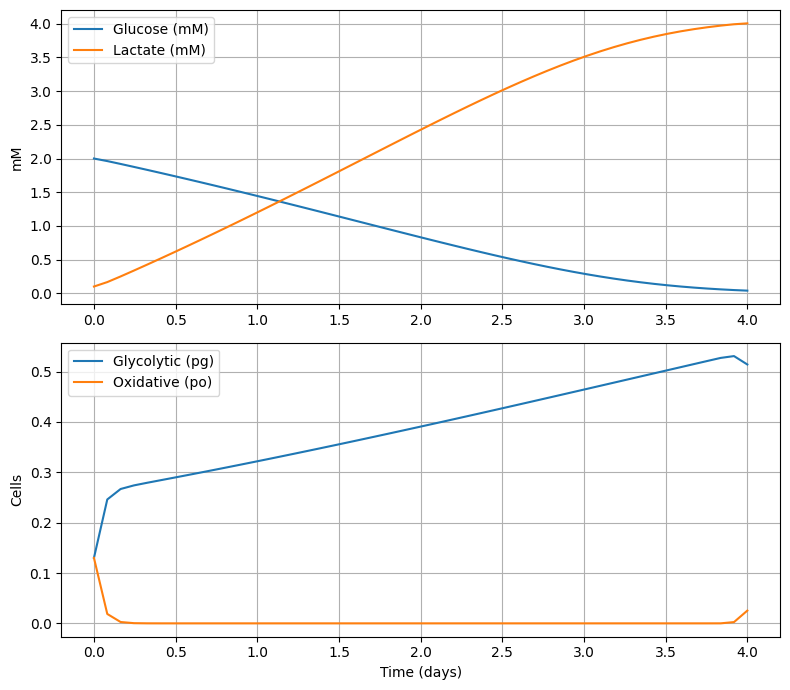

In [19]:
# @title


plt.figure(figsize=(8,7))
plt.subplot(2,1,1)
plt.plot(result_LN229['time'], result_LN229['G'], label='Glucose (mM)')
plt.plot(result_LN229['time'], result_LN229['L'], label='Lactate (mM)')
plt.ylabel('mM')
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(result_LN229['time'], result_LN229['pg'], label='Glycolytic (pg)')
plt.plot(result_LN229['time'], result_LN229['po'], label='Oxidative (po)')
plt.ylabel('Cells')
plt.xlabel('Time (days)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Figure 3.a

# Cell accumulation of LN18 and LN229

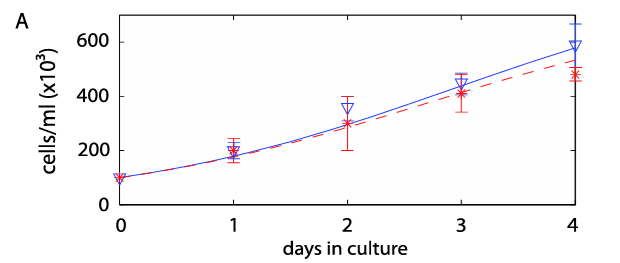

Since, the Oxidative proliferation of very less to zero in this experiment for first 4 days i am displaying pg but ideally the cell population should be p = pg + po

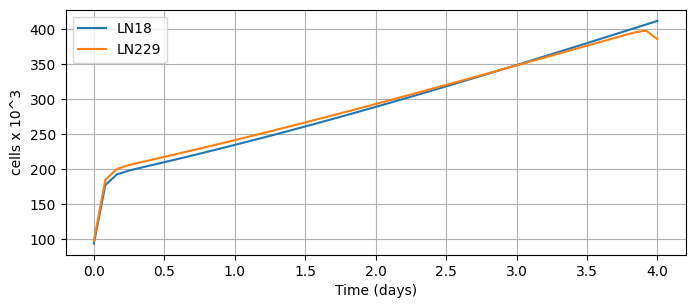

In [20]:
# @title
plt.figure(figsize=(8,7))
plt.subplot(2,1,1)
plt.plot(result_LN18['time'], (result_LN18['pg'] * 850), label='LN18')
plt.plot(result_LN229['time'], (result_LN229['pg'] * 750), label='LN229')
plt.ylabel('cells x 10^3')
plt.xlabel('Time (days)')
plt.legend()
plt.grid(True)

# Figure 3.b

# Glucose concentration for LN18 and LN229 cells

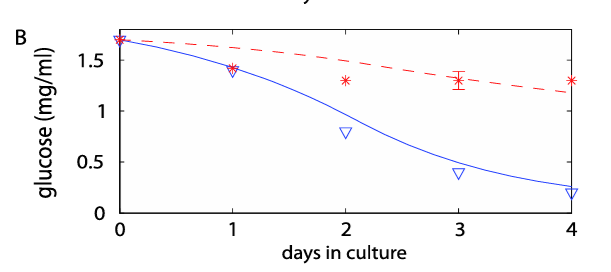

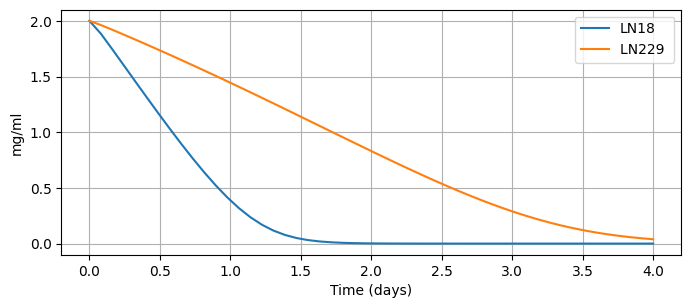

In [21]:
# @title
plt.figure(figsize=(8,7))
plt.subplot(2,1,1)
plt.plot(result_LN18['time'], result_LN18['G'], label='LN18')
plt.plot(result_LN229['time'], result_LN229['G'], label='LN229 ')
plt.ylabel('mg/ml')
plt.xlabel('Time (days)')
plt.legend()
plt.grid(True)

# Figure 3 C

# Lactate concentration for LN18 and LN229

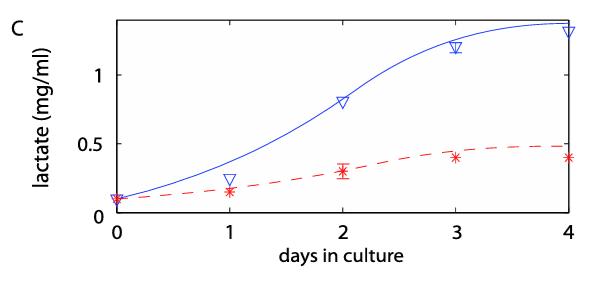

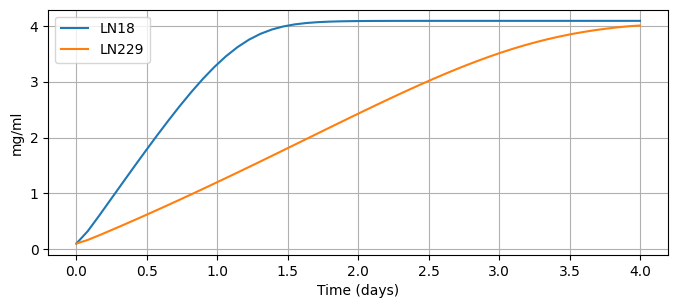

In [22]:
# @title
plt.figure(figsize=(8,7))
plt.subplot(2,1,1)
plt.plot(result_LN18['time'], result_LN18['L'], label='LN18')
plt.plot(result_LN229['time'], result_LN229['L'], label='LN229')
plt.ylabel('mg/ml')
plt.xlabel('Time (days)')
plt.legend()
plt.grid(True)

# Introducting O2 to the system

# Proliferation of po and pg

We are introducting oxygen switch with the oxidative and glycolysis proliferation of cells, that enables the aerobic respiration

$\begin{aligned} \frac{d p_o}{d t} & =\frac{1}{\tau_o}\left(1-p_o-p_g\right) p_o+\frac{1}{\tau_{g o}} \ {(\chi_L(L) \chi_O(O))} p_g-\frac{1}{\tau_{o g}} \chi_L^*(L) \chi_O^*(O) \chi_G(G) p_o, \\ \frac{d p_g}{d t} & =\frac{1}{\tau_g}\left(1-p_o-p_g\right) p_g-\frac{1}{\tau_{g o}} \ (\chi_L(L) \chi_O(O)) p_g+\frac{1}{\tau_{o g}} \chi_L^*(L)\chi_O^*(O) \chi_G(G) p_o \end{aligned}$





# Oxygen Switch

Assuming oxygen switch as a step funtions with the thresholds aligned to Lactate concentration ( 1 mole of lactate consumes 3 O2)


$\chi_O(O)= \begin{cases}0, & \text { if } O \leq O_{\mathrm{min}}, \\ 1, & \text { if } O>O_{\mathrm{min}},\end{cases}$

$\chi_O^*(O)= \begin{cases}1, & \text { if } O \leq O_{\mathrm{min}}, \\ 0, & \text { if } O>O_{\mathrm{min}},\end{cases}$

# Nutrients dynamics



$\begin{aligned}\\ \frac{d G}{d t} & =-\kappa_o \frac{G}{G+\lambda L+n_*} \frac{O}{O + O_*}p_o-\kappa_G \frac{G}{G+G_*} p_g, \\ \frac{d L}{d t} & =-\kappa_L \frac{L}{G / \lambda+L+m_*}\frac{O}{O + O_*} p_o+2 \kappa_G \frac{G}{G+G_*} p_g \\ \frac{d O}{d t} & =-3\kappa_L \frac{L}{G / \lambda+L+m_*}\frac{O}{O + O_*} p_o -6\kappa_o \frac{G}{G+\lambda L+n_*} \frac{O}{O + O_*}p_o.\end{aligned}$

# All the above ODEs put together

$\begin{aligned} \frac{d p_o}{d t} & =\frac{1}{\tau_o}\left(1-p_o-p_g\right) p_o+\frac{1}{\tau_{g o}} \ {(\chi_L(L) \chi_O(O))} p_g-\frac{1}{\tau_{o g}} \chi_L^*(L) \chi_O^*(O) \chi_G(G) p_o, \\ \frac{d p_g}{d t} & =\frac{1}{\tau_g}\left(1-p_o-p_g\right) p_g-\frac{1}{\tau_{g o}} \ (\chi_L(L) \chi_O(O)) p_g+\frac{1}{\tau_{o g}} \chi_L^*(L)\chi_O^*(O) \chi_G(G) p_o, \\ \frac{d G}{d t} & =-\kappa_o \frac{G}{G+\lambda L+n_*} \frac{O}{O + O_*}p_o-\kappa_G \frac{G}{G+G_*} p_g, \\ \frac{d L}{d t} & =-\kappa_L \frac{L}{G / \lambda+L+m_*}\frac{O}{O + O_*} p_o+2 \kappa_G \frac{G}{G+G_*} p_g \\ \frac{d O}{d t} & =-3\kappa_L \frac{L}{G / \lambda+L+m_*}\frac{O}{O + O_*} p_o -6\kappa_o \frac{G}{G+\lambda L+n_*} \frac{O}{O + O_*}p_o.\end{aligned}$


$\chi_L(L)=\frac{1}{2}\left[1+\tanh \left(\gamma\left(L-L_*\right)\right)\right]$

$\chi_L^*(L)= 1 - \chi_L(L)$

$\chi_G(G)= \begin{cases}0, & \text { if } G \leq G_{\mathrm{min}}, \\ 1, & \text { if } G>G_{\mathrm{min}},\end{cases}$

$\chi_O(O)= \begin{cases}0, & \text { if } O \leq O_{\mathrm{min}}, \\ 1, & \text { if } O>O_{\mathrm{min}},\end{cases}$

$\chi_O^*(O)= \begin{cases}1, & \text { if } O \leq O_{\mathrm{min}}, \\ 0, & \text { if } O>O_{\mathrm{min}},\end{cases}$

In [23]:
# @title

antimony_LN18_hypoxia = r'''

model glc_lac_simple()

  // G'  = -(ko * (O / (O + O_star))* (G * po)/(G + (lam * L) + n)) - (kG * (G *pg)/(G + G_star));

  R_1: G -> ; ko * (G/(G + (lam * L) + n)) * (O / (O + O_star))* po;
  R_2: G -> ; kG * (G/(G + G_star))  * pg ;

  // L'  = -(kL * (O / (O + O_star))* (L * po)/((G/lam) + L + m)) + (2*kG * (G *pg)/(G + G_star));

  R_3: L -> ; kL * (L /((G/lam) + L + m)) * (O / (O + O_star)) * po;
  R_4: -> L ; 2 * kG * (G /(G + G_star)) * pg;

  // o' = -6(ko * (O / (O + O_star))* (G * po)/(G + (lam * L) + n)) -3(kL * (O / (O + O_star))* (L * po)/((G/lam) + L + m))
  R_11: O ->; 6 * (ko * (O / (O + O_star))* (G * po)/(G + (lam * L) + n)) + 3 * (kL * (O / (O + O_star))* (L * po)/((G/lam) + L + m))

  // po' = ( (1/to) * (1 - po - pg) * po ) + ( (1/tgo) * (XL + XO)  * pg ) - ( (1/tog) * XL_star * XO * XG * po );

  R_5: -> po ; (1/to) * (1 - po - pg) * po;
  R_6: pg -> po ; (1/tgo) * XL * XO * pg;
  //R_7: po -> ; (1/tog) * XL_star * XO_star* XG * po;

  // pg' = ( (1/tg) * (1 - po - pg) * pg ) - ( (1/tgo) * XL * XO * pg ) + ( (1/tog) * XL_star * XO_star * XG * po );

  R_8: -> pg ; (1/tg) * (1 - po - pg) * pg;
  //R_9: pg -> ; (1/tgo) * XL * XO * pg;
  R_10: po -> pg ; (1/tog) * XL_star * XO_star* XG * po;

  // switches
  XL := (1/2) * (1 + tanh( a * ( L - L_star)))
  XL_star := 1 - XL
  XO := piecewise(0, O <= O_star, 1)
  XO_star := piecewise(1, O <= O_star, 0)
  XG := piecewise(0, G <= G_star, 1)


  // Species (initial values)
  G  = 0.0;        // extracellular glucose (mM)
  L  = 30.0;        // extracellular lactate (mM)
  O = 60;          // extracellular Oxygen
  pg = 0.11;        // glycolytic cells (cells) in percentage to total p*
  po = 0.11;        // oxidative cells (cells) in percentage to total P*


  // Parameters
  L_star = 10
  G_star = 0.5
  O_star = 3
  ko = 1.5
  kG = 10
  kL = 5
  n = 1
  m = 1
  lam = 100
  to = 3.321
  tg = 3.321
  tgo = 1
  tog = 1/24
  a = 100



end
'''
r_LN18_hypoxia = te.loadAntimonyModel(antimony_LN18_hypoxia)

def simulate_antimony(G=2.0, L=0.1, time_end=10):
    model = r_LN18_hypoxia

    model.reset()

    model.G = G
    model.L = L


    result = model.simulate(0, time_end, 500, ['time','G','L','O','po', 'pg'])

    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.plot(result['time'], result['G'], label='G')
    plt.plot(result['time'], result['L'], label='L')
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.title(f'Simulation: G={G:.2f}, L={L:.2f}')
    plt.legend()

    plt.subplot(1,3,2)
    plt.plot(result['time'], result['po'], label='po')
    plt.plot(result['time'], result['pg'], label='pg')
    plt.xlabel('Time')
    plt.ylabel('Cells')
    plt.title(f'Simulation: G={G:.2f}, L={L:.2f}')
    plt.legend()

    plt.subplot(1,3,3)
    plt.plot(result['time'], result['O'], label='O')
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.title(f'Simulation: G={G:.2f}, L={L:.2f}')
    plt.legend()


    plt.tight_layout()
    plt.show()

widgets.interact(
    simulate_antimony,
    G=widgets.FloatSlider(min=0.0, max=30.0, step=0.01, value=0.0),
    L=widgets.FloatSlider(min=0.0, max=30.0, step=0.01, value=30.0),
    time_end=widgets.FloatSlider(min=1, max=10, step=1, value=4)
)


interactive(children=(FloatSlider(value=0.0, description='G', max=30.0, step=0.01), FloatSlider(value=30.0, de…

<function __main__.simulate_antimony(G=2.0, L=0.1, time_end=10)>

# Inference

1. Adding O₂ dynamics allows the model to explain metabolic flexibility rather than fixed glycolysis.

2. So the model can now predict- When cells oxidize glucose, When cells oxidize lactate, When they revert to glycolysis.

3. Also availability of oxygen and nutrients is an important part for a model to determine the cells necrotic behaviour

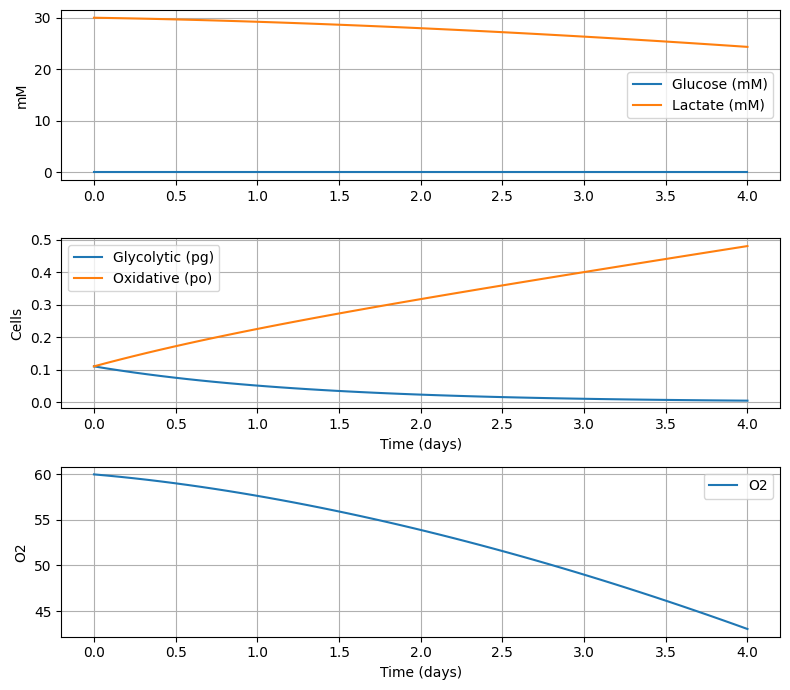

In [24]:
# @title

r_LN18_hypoxia = te.loadAntimonyModel(antimony_LN18_hypoxia)
result_LN18_hypoxia= r_LN18_hypoxia.simulate(0, 4, 50, ['time','G','L','O','po','pg'])

plt.figure(figsize=(8,7))
plt.subplot(3,1,1)
plt.plot(result_LN18_hypoxia['time'], result_LN18_hypoxia['G'], label='Glucose (mM)')
plt.plot(result_LN18_hypoxia['time'], result_LN18_hypoxia['L'], label='Lactate (mM)')
plt.ylabel('mM')
plt.legend()
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(result_LN18_hypoxia['time'], result_LN18_hypoxia['pg'], label='Glycolytic (pg)')
plt.plot(result_LN18_hypoxia['time'], result_LN18_hypoxia['po'], label='Oxidative (po)')
plt.ylabel('Cells')
plt.xlabel('Time (days)')
plt.legend()
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(result_LN18_hypoxia['time'], result_LN18_hypoxia['O'], label='O2')
plt.ylabel('O2')
plt.xlabel('Time (days)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Exercise_1:

How do cells decide whether  to consume oxygen and lactate instead or glucose as during aerobic phosphorylation?

In [25]:
# @title


def simulate_antimony(lam=1.0, G = 30, L =10, time_end=30):
    model = r_oxi

    model.reset()
    model.lam = max(lam, 1e-6)
    model.G = max(G, 1e-6)
    model.L = max(L, 1e-6)



    model.integrator.relative_tolerance = 1e-6
    model.integrator.absolute_tolerance = 1e-12
    model.integrator.stiff = True


    result = model.simulate(0, time_end, 1000, ['time','G','L','po'])

    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.plot(result['time'], result['G'], label='G')
    plt.plot(result['time'], result['L'], label='L')
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.title(f'Simulation: lam={lam:.2f}')
    plt.legend()
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(result['time'], result['po'], label='po')
    plt.xlabel('Time')
    plt.ylabel('Cells')
    plt.title(f'Simulation: lam={lam:.2f}')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

widgets.interact(
    simulate_antimony,
    lam=widgets.FloatSlider(min=0.1, max=100.0, step=0.01, value=1.0),
    L=widgets.FloatSlider(min=0.0, max=30.0, step=0.01, value=10.0),
    G=widgets.FloatSlider(min=0.0, max=30.0, step=0.01, value=10.0),
    time_end=widgets.FloatSlider(min=1, max=50, step=1, value=10)
)

interactive(children=(FloatSlider(value=1.0, description='lam', min=0.1, step=0.01), FloatSlider(value=10.0, d…

<function __main__.simulate_antimony(lam=1.0, G=30, L=10, time_end=30)>

Answer:

Varying the MCT1 factors and analysing the aerobic metabolism using glucose and lactate how the preference changes as we change ($\lambda$ = $\alpha L$/ $\alpha G$)


# Exercise 2:

How does the change in the PH of the medium affect the oxidative and glycolysis metabolism.



In [26]:
# @title


def simulate_antimony(L=1.0, G = 30.0, time_end=30):
    r_LN18.reset()
    model = r_LN18

    model.reset()
    model.L = L
    model.G = G

    model.integrator.relative_tolerance = 1e-6
    model.integrator.absolute_tolerance = 1e-12
    model.integrator.stiff = True

    result = model.simulate(0, time_end, 1000, ['time','G','L','po','pg'])

    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.plot(result['time'], result['G'], label='G')
    plt.plot(result['time'], result['L'], label='L')
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.title(f'Simulation: G={G:.2f} and L={L:.2f}')
    plt.legend()
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(result['time'], result['po'], label='po')
    plt.plot(result['time'], result['pg'], label='pg')
    plt.xlabel('Time')
    plt.ylabel('Cells')
    plt.title(f'Simulation: G={G:.2f} and L={L:.2f}')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

widgets.interact(
    simulate_antimony,
    G=widgets.FloatSlider(min=0.1, max=30.0, step=0.01, value=14.0),
    L=widgets.FloatSlider(min=0.0, max=30.0, step=0.01, value=5.0),
    time_end=widgets.FloatSlider(min=1, max=50, step=1, value=4)
)

interactive(children=(FloatSlider(value=5.0, description='L', max=30.0, step=0.01), FloatSlider(value=14.0, de…

<function __main__.simulate_antimony(L=1.0, G=30.0, time_end=30)>

Answer:

Tumor cells constantly produce acidic metabolites—especially lactic acid—as a result of high glycolytic flux. In an in-vitro culture dish, this acid accumulates in the medium, lowering the extracellular pH (pHe). Cancer cells are very sensitive to these pH changes, and this sensitivity strongly influences growth, metabolism, and viability.

[Medium pH drops]

↓

[Cells sense acidity]

↓

[oxidative ↑ → less lactate/H⁺ ]

↓

[Glucose uptake ↓] [Lactate uptake ↑]

↓

[Medium pH improves further]

This describes the fact that glucolysis is pH dependent, which means a strict control of the intracellular pH is required to access the subsequent reactions of glycolysis that lead to ATP production.

# Exercise_3:

What will happen if the glucose and O2 supply cut down completely to the medium?


In [27]:
# @title

def simulate_antimony(G=1.0, L=10, O = 50  ,time_end=10):

    r_LN18_hypoxia.reset()
    r_LN18_hypoxia.G = G
    r_LN18_hypoxia.L = L
    r_LN18_hypoxia.O = O


    result = r_LN18_hypoxia.simulate(0, time_end, 500, ['time','G','L', 'O', 'po','pg'])

    plt.figure(figsize=(5,10))
    plt.subplot(3,1,1)
    plt.plot(result['time'], result['G'], label='G')
    plt.plot(result['time'], result['L'], label='L')
    plt.xlabel('Time')
    plt.ylabel('mM')
    plt.title(f'Simulation: G={G:.2f}, L={L:.2f}, O={O:.2f}')
    plt.legend()
    plt.show()

    plt.subplot(3,1,2)
    plt.plot(result['time'], result['po'], label='po')
    plt.plot(result['time'], result['pg'], label='pg')
    plt.xlabel('Time')
    plt.ylabel('Cells')
    plt.title(f'Simulation: G={G:.2f}, L={L:.2f} , O={O:.2f}')
    plt.legend()
    plt.show()

    plt.subplot(3,1,3)
    plt.plot(result['time'], result['O'], label='O2 Consumption')
    plt.xlabel('Time')
    plt.ylabel('mM')
    plt.title(f'Simulation: G={G:.2f}, L={L:.2f}, O={O:.2f}')
    plt.legend()

    plt.show()

widgets.interact(
    simulate_antimony,
    G=widgets.FloatSlider(min=0.0, max=30.0, step=0.01, value=10.0),
    L=widgets.FloatSlider(min=0.0, max=30.0, step=0.01, value=10.0),
    O=widgets.FloatSlider(min=0.0, max=50.0, step=0.01, value= 20.0),
    time_end=widgets.FloatSlider(min=1, max=50, step=1, value=10)
)

interactive(children=(FloatSlider(value=10.0, description='G', max=30.0, step=0.01), FloatSlider(value=10.0, d…

<function __main__.simulate_antimony(G=1.0, L=10, O=50, time_end=10)>

Answer:

Complete deprivation of glucose and oxygen eliminates all major ATP-generating pathways, forcing cells into energy collapse and resulting in rapid growth arrest.

Immediate metabolic response:
1. Glucose = 0
2. Glycolysis stops → no ATP from glucose
3. Lactate production ceases
4. Glycolytic cells lose their primary energy source

1. Oxygen = 0
2. Oxidative phosphorylation stops
3. Oxidative cells -> cannot generate ATP
4. Mitochondrial ATP production collapses

# Summary:

1. In this computational modeling study, we characterized the metabolic interplay between glucose, lactate, and oxygen in cancer cell energetics using a systems-biology approach.
2. By formulating and analyzing differential-equation–based models, we captured how cancer cells dynamically switch between glycolysis and oxidative phosphorylation depending on substrate availability and oxygen tension.
3. The model successfully reproduced cancer metabolism, including elevated glucose consumption, lactate production under hypoxia, and lactate reutilization as an oxidative fuel under aerobic conditions.
4. Simulations demonstrated that even small changes in oxygen concentration can significantly alter flux distributions, highlighting the tight coupling between metabolic pathways.
5. Overall, this work provides a quantitative framework to predict metabolic behaviors, evaluate nutrient competition, and guide hypothesis generation for experimental validation.
5. The model can be further extended to include cell necrosis, pH regulation, transporter kinetics, and cell-cell metabolic interactions for more physiologically realistic tumor microenvironment simulations.


# Reference:

Mendoza-Juez B, Martínez-González A, Calvo GF, Pérez-García VM. A mathematical model for the glucose-lactate metabolism of in vitro cancer cells. Bull Math Biol. 2012 May;74(5):1125-42. doi: 10.1007/s11538-011-9711-z. Epub 2011 Dec 22. PMID: 22190043.

In [2]:
!pip install notebook ipywidgets

In [28]:
import nbformat

# Load your notebook
nb = nbformat.read(r"C:\Users\LENOVO\Downloads\Cancel_Cell_Metabolism_Final (1).ipynb", as_version=4)

# Remove widget metadata
nb.metadata.pop("widgets", None)

# Save cleaned notebook
nbformat.write(nb, r"C:\Users\LENOVO\Downloads\Cancer_Cell_Metabolism_Final_clean.ipynb")


In [29]:
!jupyter nbconvert Cancer_Cell_Metabolism_Final_clean.ipynb --to html


[NbConvertApp] Converting notebook Cancer_Cell_Metabolism_Final_clean.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 855261 bytes to Cancer_Cell_Metabolism_Final_clean.html
